In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import cPickle as pkl
import os
import pylab
import sys
import lmdb
import time
import theano
%matplotlib inline
#import Image

# Make sure that caffe is on the python path:
caffe_root = '../../caffe/'  # this file is expected to be in {caffe_root}/examples
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe

# configure plotting
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## init network

In [15]:
# Load the net, list its data and params, and filter an example image.
caffe.set_mode_gpu()
caffe.set_device(6)
net = caffe.Net('model/VGG_ILSVRC_19_layers_deploy.prototxt', \
                '../multi-label/flickr30k/model_vgg19/lmdb1/vgg19_snapshot_iter_8000.caffemodel', caffe.TEST)
print("blobs {}\nparams {}".format(net.blobs.keys(), net.params.keys()))



blobs ['data', 'conv1_1', 'conv1_2', 'pool1', 'conv2_1', 'conv2_2', 'pool2', 'conv3_1', 'conv3_2', 'conv3_3', 'conv3_4', 'pool3', 'conv4_1', 'conv4_2', 'conv4_3', 'conv4_4', 'pool4', 'conv5_1', 'conv5_2', 'conv5_3', 'conv5_4', 'pool5', 'fc6', 'fc7', 'fc8', 'prob']
params ['conv1_1', 'conv1_2', 'conv2_1', 'conv2_2', 'conv3_1', 'conv3_2', 'conv3_3', 'conv3_4', 'conv4_1', 'conv4_2', 'conv4_3', 'conv4_4', 'conv5_1', 'conv5_2', 'conv5_3', 'conv5_4', 'fc6', 'fc7', 'fc8']


In [14]:
ww = 0.2
emb_params = np.load('../order-embedding/snapshots/flickr_sentence-image-finetuned-lmdb1bak_topic-insert_0.2_order_1.npz')

In [17]:
caffe.set_mode_gpu()
caffe.set_device(6)
net_emb = caffe.Net('model/VGG_ILSVRC_19_layers_deploy_emb.prototxt', \
                '../multi-label/flickr30k/model_vgg19/lmdb1/vgg19_snapshot_iter_8000.caffemodel', caffe.TEST)
print("blobs {}\nparams {}".format(net_emb.blobs.keys(), net_emb.params.keys()))

net_emb.params['emb'][0].data[:] = emb_params['ff_image_W'].T
net_emb.params['emb'][1].data[:] = emb_params['ff_image_b']
net_emb.save('model/VGG_ILSVRC_19_layers_deploy_emb_t100_flickr.caffemodel')

blobs ['data', 'conv1_1', 'conv1_2', 'pool1', 'conv2_1', 'conv2_2', 'pool2', 'conv3_1', 'conv3_2', 'conv3_3', 'conv3_4', 'pool3', 'conv4_1', 'conv4_2', 'conv4_3', 'conv4_4', 'pool4', 'conv5_1', 'conv5_2', 'conv5_3', 'conv5_4', 'pool5', 'fc6', 'fc7', 'emb']
params ['conv1_1', 'conv1_2', 'conv2_1', 'conv2_2', 'conv3_1', 'conv3_2', 'conv3_3', 'conv3_4', 'conv4_1', 'conv4_2', 'conv4_3', 'conv4_4', 'conv5_1', 'conv5_2', 'conv5_3', 'conv5_4', 'fc6', 'fc7', 'emb']


In [18]:
topic_net_emb = caffe.Net('model/topic_emb_t100.prototxt', caffe.TEST)
print("blobs {}\nparams {}".format(topic_net_emb.blobs.keys(), topic_net_emb.params.keys()))

topic_net_emb.params['emb'][0].data[:] = emb_params['ff_topic_W'].T
topic_net_emb.params['emb'][1].data[:] = emb_params['ff_topic_b']
print(emb_params['ff_topic_W'].shape, topic_net_emb.params['emb'][0].data.shape)

topic_net_emb.save('model/topic_emb_t100_flickr.caffemodel')

blobs ['data', 'emb']
params ['emb']
((100, 1024), (1024, 100))


## for resnet

In [20]:
# Load the net, list its data and params, and filter an example image.
caffe.set_mode_gpu()
caffe.set_device(0)
net = caffe.Net('model/model_resnet101_deploy.prototxt', \
                '../multi-label/model_resnet101_t200/resnet101_snapshot_iter_25000.caffemodel', caffe.TEST)
print("blobs {}\nparams {}".format(net.blobs.keys(), net.params.keys()))



blobs ['data', 'conv1', 'pool1', 'pool1_pool1_0_split_0', 'pool1_pool1_0_split_1', 'res2a_branch1', 'res2a_branch2a', 'res2a_branch2b', 'res2a_branch2c', 'res2a', 'res2a_res2a_relu_0_split_0', 'res2a_res2a_relu_0_split_1', 'res2b_branch2a', 'res2b_branch2b', 'res2b_branch2c', 'res2b', 'res2b_res2b_relu_0_split_0', 'res2b_res2b_relu_0_split_1', 'res2c_branch2a', 'res2c_branch2b', 'res2c_branch2c', 'res2c', 'res2c_res2c_relu_0_split_0', 'res2c_res2c_relu_0_split_1', 'res3a_branch1', 'res3a_branch2a', 'res3a_branch2b', 'res3a_branch2c', 'res3a', 'res3a_res3a_relu_0_split_0', 'res3a_res3a_relu_0_split_1', 'res3b1_branch2a', 'res3b1_branch2b', 'res3b1_branch2c', 'res3b1', 'res3b1_res3b1_relu_0_split_0', 'res3b1_res3b1_relu_0_split_1', 'res3b2_branch2a', 'res3b2_branch2b', 'res3b2_branch2c', 'res3b2', 'res3b2_res3b2_relu_0_split_0', 'res3b2_res3b2_relu_0_split_1', 'res3b3_branch2a', 'res3b3_branch2b', 'res3b3_branch2c', 'res3b3', 'res3b3_res3b3_relu_0_split_0', 'res3b3_res3b3_relu_0_split_1'

In [68]:
bn_mean_var = {}
ind = 1
for key in net.params.keys() :
    if (len(net.params[key]) == 3) :
        print key
        bn_mean_var[str(ind)] = net.params[key][0].data
        bn_mean_var[str(ind+1)] = net.params[key][1].data
        ind += 2
print(len(bn_mean_var))        
    

bn_conv1
bn2a_branch1
bn2a_branch2a
bn2a_branch2b
bn2a_branch2c
bn2b_branch2a
bn2b_branch2b
bn2b_branch2c
bn2c_branch2a
bn2c_branch2b
bn2c_branch2c
bn3a_branch1
bn3a_branch2a
bn3a_branch2b
bn3a_branch2c
bn3b1_branch2a
bn3b1_branch2b
bn3b1_branch2c
bn3b2_branch2a
bn3b2_branch2b
bn3b2_branch2c
bn3b3_branch2a
bn3b3_branch2b
bn3b3_branch2c
bn4a_branch1
bn4a_branch2a
bn4a_branch2b
bn4a_branch2c
bn4b1_branch2a
bn4b1_branch2b
bn4b1_branch2c
bn4b2_branch2a
bn4b2_branch2b
bn4b2_branch2c
bn4b3_branch2a
bn4b3_branch2b
bn4b3_branch2c
bn4b4_branch2a
bn4b4_branch2b
bn4b4_branch2c
bn4b5_branch2a
bn4b5_branch2b
bn4b5_branch2c
bn4b6_branch2a
bn4b6_branch2b
bn4b6_branch2c
bn4b7_branch2a
bn4b7_branch2b
bn4b7_branch2c
bn4b8_branch2a
bn4b8_branch2b
bn4b8_branch2c
bn4b9_branch2a
bn4b9_branch2b
bn4b9_branch2c
bn4b10_branch2a
bn4b10_branch2b
bn4b10_branch2c
bn4b11_branch2a
bn4b11_branch2b
bn4b11_branch2c
bn4b12_branch2a
bn4b12_branch2b
bn4b12_branch2c
bn4b13_branch2a
bn4b13_branch2b
bn4b13_branch2c
bn4b14_bra

In [69]:
np.savez('resnet_bn_mean_var_104.npz', **bn_mean_var)

In [74]:
print(bn_mean_var['2'])

[  5.16504785e+03   6.72836768e+03   2.23211719e+03   9.02167734e+04
   1.03593274e+03   1.74547402e+04   2.80590742e+04   5.10222656e+03
   1.16309155e+03   7.52162109e+02   5.94940381e+03   1.67233691e+04
   1.80851270e+04   7.88140076e+02   9.70847168e+03   2.77441382e+03
   2.27849902e+03   1.69894806e+02   7.02992929e-06   1.77613379e+04
   2.87727676e+04   1.33931531e+03   1.54878838e+04   1.75175916e+03
   1.22551001e+03   3.51842617e+04   1.07583311e+04   6.92803369e+03
   4.33294141e+04   1.44571863e+03   1.35571426e+04   3.38130933e+03
   1.69694775e+03   2.07042949e+04   3.59632104e+03   6.32903248e-05
   7.62049622e+02   8.37931396e+02   4.09882227e+04   4.67004053e+03
   1.72112175e-06   7.72877869e+02   2.46810815e+03   9.90892871e+03
   6.50426318e+03   2.40342407e+03   2.49161804e+02   8.98686621e+03
   6.48441724e-04   4.23623877e+03   1.06154285e+03   2.37957715e+03
   4.27058594e+04   9.00390137e+03   2.85350342e+03   1.11351582e+04
   2.28526904e-08   5.32586621e+03

In [11]:
emb_params = np.load('../order-embedding/snapshots/sentence-image-finetuned-t200-lmdb1bak-topic-insert_0.2_resnet_order_1.npz')

In [9]:
caffe.set_mode_gpu()
caffe.set_device(0)
net_emb = caffe.Net('model/model_resnet101_deploy_emb.prototxt', \
                '../multi-label/model_resnet101_t200/resnet101_snapshot_iter_25000.caffemodel', caffe.TEST)
print("blobs {}\nparams {}".format(net_emb.blobs.keys(), net_emb.params.keys()))

conv1_param0 = net_emb.params['conv1'][0].data.copy()
net_emb.params['conv1'][0].data[:,0,:,:] = conv1_param0[:,2,:,:]
net_emb.params['conv1'][0].data[:,2,:,:] = conv1_param0[:,0,:,:]

net_emb.params['emb'][0].data[:] = emb_params['ff_image_W'].T
net_emb.params['emb'][1].data[:] = emb_params['ff_image_b']
net_emb.save('model/model_resnet101_deploy_emb.caffemodel')

blobs ['data', 'conv1', 'pool1', 'pool1_pool1_0_split_0', 'pool1_pool1_0_split_1', 'res2a_branch1', 'res2a_branch2a', 'res2a_branch2b', 'res2a_branch2c', 'res2a', 'res2a_res2a_relu_0_split_0', 'res2a_res2a_relu_0_split_1', 'res2b_branch2a', 'res2b_branch2b', 'res2b_branch2c', 'res2b', 'res2b_res2b_relu_0_split_0', 'res2b_res2b_relu_0_split_1', 'res2c_branch2a', 'res2c_branch2b', 'res2c_branch2c', 'res2c', 'res2c_res2c_relu_0_split_0', 'res2c_res2c_relu_0_split_1', 'res3a_branch1', 'res3a_branch2a', 'res3a_branch2b', 'res3a_branch2c', 'res3a', 'res3a_res3a_relu_0_split_0', 'res3a_res3a_relu_0_split_1', 'res3b1_branch2a', 'res3b1_branch2b', 'res3b1_branch2c', 'res3b1', 'res3b1_res3b1_relu_0_split_0', 'res3b1_res3b1_relu_0_split_1', 'res3b2_branch2a', 'res3b2_branch2b', 'res3b2_branch2c', 'res3b2', 'res3b2_res3b2_relu_0_split_0', 'res3b2_res3b2_relu_0_split_1', 'res3b3_branch2a', 'res3b3_branch2b', 'res3b3_branch2c', 'res3b3', 'res3b3_res3b3_relu_0_split_0', 'res3b3_res3b3_relu_0_split_1'

In [12]:
caffe.set_mode_gpu()
caffe.set_device(0)
net_emb = caffe.Net('model/model_resnet101_deploy_emb.prototxt', \
                'model/model_resnet101_deploy_emb2.caffemodel', caffe.TEST)
print("blobs {}\nparams {}".format(net_emb.blobs.keys(), net_emb.params.keys()))
print((net_emb.params['emb'][0].data[:] - emb_params['ff_image_W'].T).sum())
print((net_emb.params['emb'][1].data[:] - emb_params['ff_image_b']).sum())


blobs ['data', 'conv1', 'pool1', 'pool1_pool1_0_split_0', 'pool1_pool1_0_split_1', 'res2a_branch1', 'res2a_branch2a', 'res2a_branch2b', 'res2a_branch2c', 'res2a', 'res2a_res2a_relu_0_split_0', 'res2a_res2a_relu_0_split_1', 'res2b_branch2a', 'res2b_branch2b', 'res2b_branch2c', 'res2b', 'res2b_res2b_relu_0_split_0', 'res2b_res2b_relu_0_split_1', 'res2c_branch2a', 'res2c_branch2b', 'res2c_branch2c', 'res2c', 'res2c_res2c_relu_0_split_0', 'res2c_res2c_relu_0_split_1', 'res3a_branch1', 'res3a_branch2a', 'res3a_branch2b', 'res3a_branch2c', 'res3a', 'res3a_res3a_relu_0_split_0', 'res3a_res3a_relu_0_split_1', 'res3b1_branch2a', 'res3b1_branch2b', 'res3b1_branch2c', 'res3b1', 'res3b1_res3b1_relu_0_split_0', 'res3b1_res3b1_relu_0_split_1', 'res3b2_branch2a', 'res3b2_branch2b', 'res3b2_branch2c', 'res3b2', 'res3b2_res3b2_relu_0_split_0', 'res3b2_res3b2_relu_0_split_1', 'res3b3_branch2a', 'res3b3_branch2b', 'res3b3_branch2c', 'res3b3', 'res3b3_res3b3_relu_0_split_0', 'res3b3_res3b3_relu_0_split_1'

In [17]:
print()

(array([[ 0.14527483, -0.23857509,  0.09063741, ...,  0.27779803,
        -0.11367646,  0.23926862],
       [ 0.1675534 ,  0.05229896,  0.09240571, ...,  0.23424916,
        -0.03964324,  0.15418483],
       [-0.06641624, -0.07851306, -0.16140649, ..., -0.33280972,
         0.21298496, -0.16859527],
       ..., 
       [-0.03727573, -0.30777329,  0.03083066, ..., -0.12155162,
         0.21641536, -0.26752511],
       [-0.10732369,  0.05358455,  0.00255531, ..., -0.06736217,
         0.00786374, -0.24415411],
       [ 0.03553739, -0.15952079, -0.06522321, ..., -0.11208664,
        -0.03188778, -0.0889743 ]], dtype=float32), array([[ 0.14527483,  0.1675534 , -0.06641624, ..., -0.03727573,
        -0.10732369,  0.03553739],
       [-0.23857509,  0.05229896, -0.07851306, ..., -0.30777329,
         0.05358455, -0.15952079],
       [ 0.09063741,  0.09240571, -0.16140649, ...,  0.03083066,
         0.00255531, -0.06522321],
       ..., 
       [ 0.27779803,  0.23424916, -0.33280972, ..., -0.1

In [4]:
topic_net_emb = caffe.Net('model/topic_emb_t200.prototxt', caffe.TEST)
print("blobs {}\nparams {}".format(topic_net_emb.blobs.keys(), topic_net_emb.params.keys()))

topic_net_emb.params['emb'][0].data[:] = emb_params['ff_topic_W'].T
topic_net_emb.params['emb'][1].data[:] = emb_params['ff_topic_b']
print(emb_params['ff_topic_W'].shape, topic_net_emb.params['emb'][0].data.shape)

topic_net_emb.save('model/topic_emb_t200_resnet.caffemodel')

blobs ['data', 'emb']
params ['emb']
((200, 1024), (1024, 200))


In [10]:
print(emb_params['ff_topic_W'].shape, emb_params['ff_topic_b'].shape)

((200, 1024), (1024,))


## test network

462341


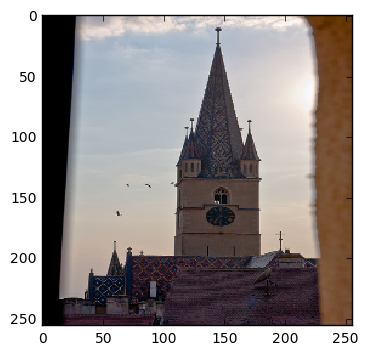

In [61]:
val_set = []
with open('../data/splits/kar_val.ids') as f:
    for line in f:
        val_set.append(int(line.strip()))

valimg_idx = 12

%matplotlib inline
img_id = val_set[valimg_idx]
print(img_id)
img_path = '../data/images/%02d/%d.jpg'%(img_id/10000, img_id)
img = cv2.imread(img_path)
img = cv2.resize(img, (256,256))
plt.imshow(img[:,:,::-1])

img = img[16:240,16:240].astype('float32') - np.array([103.939, 116.779, 123.68], dtype='float32')
img = img.transpose(2,0,1)
im_input = img[np.newaxis, :, :, :]

net.blobs['data'].reshape(*im_input.shape)
net.blobs['data'].data[...] = im_input
output = net.forward()

net_emb.blobs['data'].reshape(*im_input.shape)
net_emb.blobs['data'].data[...] = im_input
output2 = net_emb.forward()